In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import zipfile
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
df = pd.read_csv('Restaurant_Reviews.csv')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<Axes: xlabel='Liked', ylabel='count'>

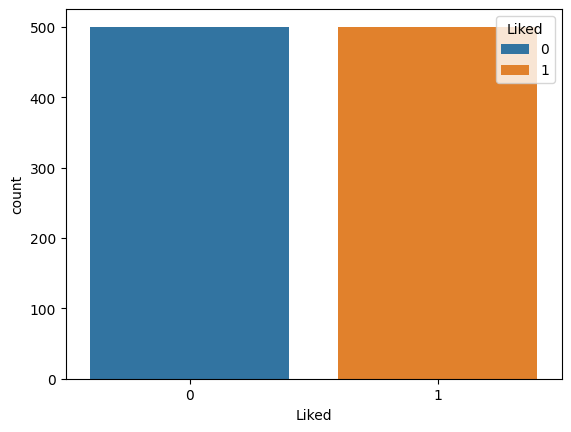

In [8]:
sns.countplot(data= df , x = 'Liked', hue='Liked')

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
x= vectorizer.fit_transform(df['Review'])


In [18]:
y = df['Liked']

In [19]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size= 0.3 , random_state=42)

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       152
           1       0.82      0.79      0.81       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



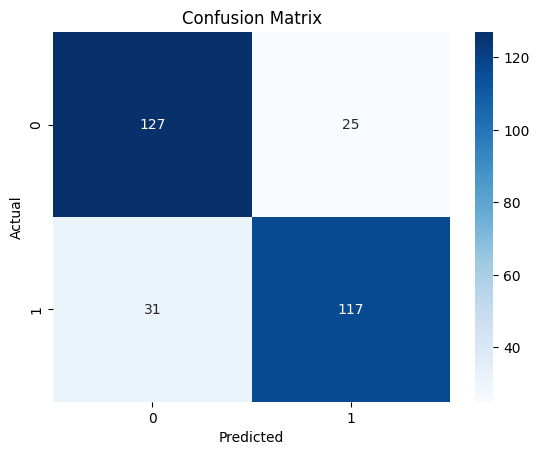

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
xticklabels=model.classes_, yticklabels=model.classes_
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()